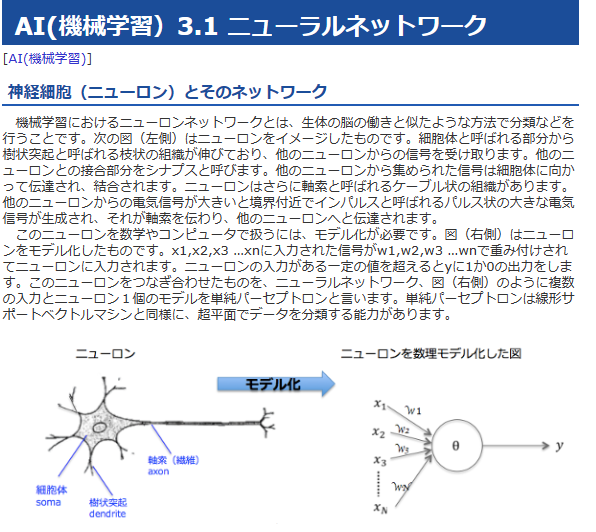

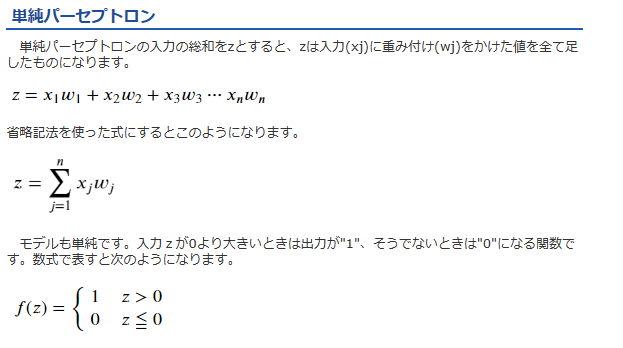

In [1]:
def AND_OR(x1, x2):
    w1, w2, b = 0.5, 0.5, 0.7 # AND
    #w1, w2, b = 0.5, 0.5, 0.1 # OR
    tmp = x1*w1 + x2*w2
    if tmp < b:
        return 0
    else:
        return 1
 
print(AND_OR(1,1))
print(AND_OR(0,1))
print(AND_OR(1,0))
print(AND_OR(0,0))

1
0
0
0


In [1]:
def AND_OR(x1, x2):
    # w1, w2, b = 0.5, 0.5, 0.7 # AND
    w1, w2, b = 0.5, 0.5, 0.1 # OR
    tmp = x1*w1 + x2*w2
    if tmp < b:
        return 0
    else:
        return 1
 
print(AND_OR(1,1))
print(AND_OR(0,1))
print(AND_OR(1,0))
print(AND_OR(0,0))

1
1
1
0


In [3]:
import numpy as np
 
#step関数
def step(num):
    if num > 0:
        return 1
    else:
        return 0
 
#入力ベクトルxと重みベクトルwの結果を返す
def predict(x,w):
    return step(x[0]*w[0] + x[1]*w[1] + w[2])
 
#逐次学習
def train(w,x,y,eta):
    o = predict(x,w)
    #print("w y o x",w,y,o,x)
    w = w + (y - o) *x * eta
    return w
 
#main処理
#andを学習させる。学習率(eta)は0,1 学習回数(epoch)は20回
if __name__ == "__main__":
    train_x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
    train_y = np.array([0,0,0,1])
    weight  = np.array([0,0,0])
    eta     = 0.1
    epoch = 20
 
    for i in range(epoch):
        for x,y in zip(train_x,train_y):
            print(x,y,predict(x,weight),weight)
            weight = train(weight,x,y,eta)
 
    #確認,0,0,0,1が出力されれば正解
    for x in train_x:
        print(predict(x,weight), end=",")


[0 0 1] 0 0 [0 0 0]
[0 1 1] 0 0 [0. 0. 0.]
[1 0 1] 0 0 [0. 0. 0.]
[1 1 1] 1 0 [0. 0. 0.]
[0 0 1] 0 1 [0.1 0.1 0.1]
[0 1 1] 0 1 [0.1 0.1 0. ]
[1 0 1] 0 0 [ 0.1  0.  -0.1]
[1 1 1] 1 0 [ 0.1  0.  -0.1]
[0 0 1] 0 0 [0.2 0.1 0. ]
[0 1 1] 0 1 [0.2 0.1 0. ]
[1 0 1] 0 1 [ 0.2  0.  -0.1]
[1 1 1] 1 0 [ 0.1  0.  -0.2]
[0 0 1] 0 0 [ 0.2  0.1 -0.1]
[0 1 1] 0 0 [ 0.2  0.1 -0.1]
[1 0 1] 0 1 [ 0.2  0.1 -0.1]
[1 1 1] 1 0 [ 0.1  0.1 -0.2]
[0 0 1] 0 0 [ 0.2  0.2 -0.1]
[0 1 1] 0 1 [ 0.2  0.2 -0.1]
[1 0 1] 0 0 [ 0.2  0.1 -0.2]
[1 1 1] 1 1 [ 0.2  0.1 -0.2]
[0 0 1] 0 0 [ 0.2  0.1 -0.2]
[0 1 1] 0 0 [ 0.2  0.1 -0.2]
[1 0 1] 0 0 [ 0.2  0.1 -0.2]
[1 1 1] 1 1 [ 0.2  0.1 -0.2]
[0 0 1] 0 0 [ 0.2  0.1 -0.2]
[0 1 1] 0 0 [ 0.2  0.1 -0.2]
[1 0 1] 0 0 [ 0.2  0.1 -0.2]
[1 1 1] 1 1 [ 0.2  0.1 -0.2]
[0 0 1] 0 0 [ 0.2  0.1 -0.2]
[0 1 1] 0 0 [ 0.2  0.1 -0.2]
[1 0 1] 0 0 [ 0.2  0.1 -0.2]
[1 1 1] 1 1 [ 0.2  0.1 -0.2]
[0 0 1] 0 0 [ 0.2  0.1 -0.2]
[0 1 1] 0 0 [ 0.2  0.1 -0.2]
[1 0 1] 0 0 [ 0.2  0.1 -0.2]
[1 1 1] 1 1 [ 0.2  0.1 -

### iris-perceptron

In [8]:
from sklearn import datasets
import numpy as np
 
#step関数
def step(num):
    return 1*int(num>0)
 
#入力ベクトルxと重みベクトルwの結果を返す
def predict(x,w):
    return step(np.dot(x,w))
 
#逐次学習
def train(w,x,y,eta):
    o = predict(x,w)
    w = w + (y - o) * x * eta
    return w
 
#main処理
#irisデータセットを特徴量2,クラス2で学習させる。学習回数(epoch)は100回
if __name__ == "__main__":
    #irisデータセットをロードして,sepal length, sepal widthの特徴量2のデータを作る
 
    iris = datasets.load_iris()
    X = iris.data
    X = X[:,:2]
    
    #データのバイアスを追加する
    b = np.ones((len(X),1))
    train_x = np.append(X, b, axis=1)
 
    #データとターゲットからiris setosa,iris versicolorを取り出す
    train_y = iris.target
    train_x = train_x[train_y!=2]
    train_y = train_y[train_y!=2]
    weight  = [0,0,0]
    eta     = 0.1
 
    epoch = 1000
    for i in range(epoch):
        for x,y in zip(train_x,train_y):
            weight = train(weight,x,y,eta)
            #print(weight)
 
    #分類テストターゲットと同じ結果になればOK
    #現状では１箇所誤認識
    prd = np.empty(len(train_x))
    for i, x in enumerate(train_x):
        prd[i] = predict(x, weight)
        
    print(train_y)
    print(np.int64(prd))
    print("正解率:{:%}".format(sum(train_y==prd)/len(train_y)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
正解率:100.000000%


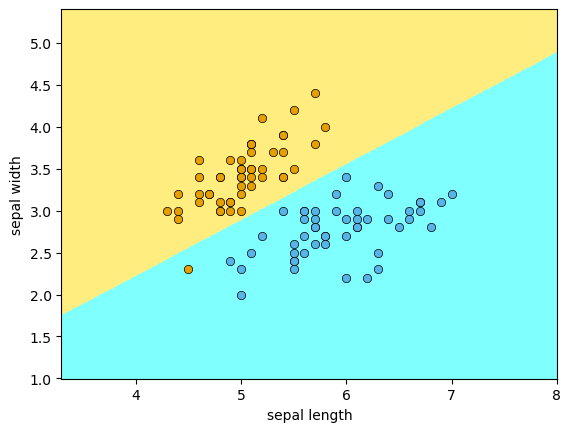

In [5]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
 
# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()
 
# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target
 
# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]
 
# ターゲットは2 (iris virginica) でないもの, 
# つまり iris setosa (0) と iris versicolor (1) のみを対象とする
# (領域の2分割)
X = X[y!=2]
y = y[y!=2]
 
# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
#clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
#clf.fit(X, y)
 
##### 分類結果を背景の色分けにより表示
 
# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1
 
# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
 
# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel(), np.ones(len(XX.ravel()))]
#Xg = np.c_[XX.ravel(), YY.ravel()]
 
# 各グリッドの点が属するクラス(0か1)の予測をZに格納
#Z = clf.predict(Xg)
Z = np.empty(len(Xg))
for i, x in enumerate(Xg):
    Z[i] = predict(x, weight)
 
# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)
 
# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])
 
# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01)
 
# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')
 
##### ターゲットに応じた色付きでデータ点を表示
 
# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]
 
# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')
 
# サポートベクトルを取得
#SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
#plt.scatter(SV[:,0], SV[:,1], c=(0,0,0,0), linewidths=1.0, edgecolors='red')
 
# 描画したグラフを表示
plt.show()
#plt.savefig("perceptron-iris.png")
 

### NumPy mgrid

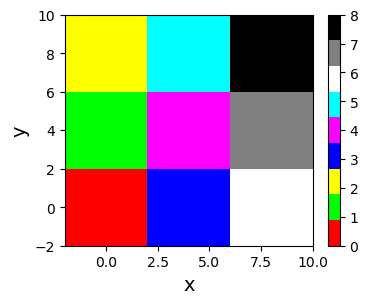

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
 
# 4×3サイズのFigureを追加
plt.figure(figsize = (4, 3))
 
# 軸ラベルを設定
plt.xlabel("x", size = 14)
plt.ylabel("y", size = 14)
 
# 格子点の作成
XX, YY = np.mgrid[0:8:3j, 0:8:3j]
 
# pcolormesで表示する色データ 0:赤 1:緑 2:青 3:白
Z = np.arange(9).reshape(3,3)
 
# 赤/緑/黄/青/紫/シアン/白/灰/黒 カラーマップ cmap を作成
# https://matplotlib.org/examples/color/colormaps_reference.html
# RGBA: 赤(1, 0, 0, 1) 緑(0, 1, 0, 1) 黄(1, 1, 0, 1) 
#       青(0, 0, 1, 1) 紫(1, 0, 1, 1) シアン(0, 1, 1, 1)
#        白(1, 1, 1, 1) 灰(0.5, 0.5, 0.5, 1) 黒(0, 0, 0, 1)
colormap = ListedColormap([(1, 0, 0, 1),(0, 1, 0, 1),(1, 1, 0, 1),
                           (0, 0, 1, 1),(1, 0, 1, 1),(0, 1, 1, 1),
                           (1, 1, 1, 1),(0.5, 0.5, 0.5, 1),(0, 0, 0, 1)])
 
# 市松模様をプロット
im = plt.pcolormesh(XX, YY, Z, cmap = colormap)
 
# カラーバーを表示
plt.colorbar(im)
 
plt.show()

### iris_mlpc

学習中…
学習完了！


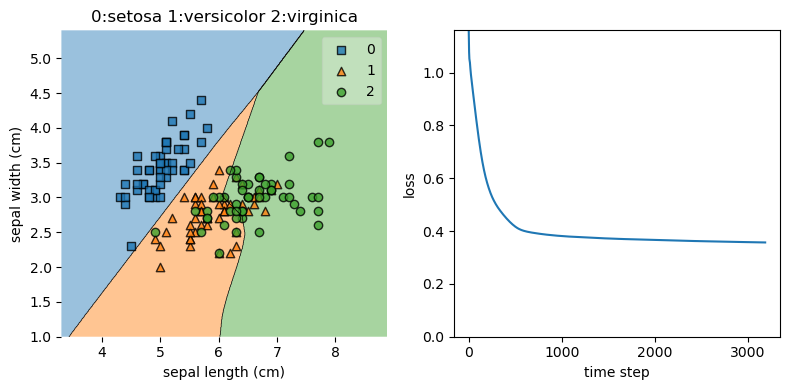

In [12]:
# -*- coding: utf-8 -*-
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
 
# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()
 
# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target
 
# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# 分類用に多層ニューラルネットワークを用意
# ランダムな要素を固定した場合（毎回同じ結果）
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10000, tol=0.00001, random_state=1)
# 毎回ランダムな場合
#clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10000, tol=0.00001, random_state=None)
 
# ニューラルネットワークの学習
print('学習中…')
clf.fit(X, y)
print('学習完了！')

# グラフウインドウの大きさを横長に定める。
fig = plt.figure(figsize=(8,4))
 
# 縦に1枚、横に2枚のグラフの1枚目を設定
ax = fig.add_subplot(121)
# グラフ描画
plot_decision_regions(X, y, clf=clf)
 
# Adding axes annotations
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
title = '0:'+iris.target_names[0] + ' 1:'+iris.target_names[1] + ' 2:' + iris.target_names[2]
ax.set_title(title)
 
# 縦に1枚、横に2枚のグラフの2枚目を設定
ax = fig.add_subplot(122)
#
## 損失関数のグラフの軸ラベルを設定
ax.set_xlabel('time step')
ax.set_ylabel('loss')
#
## グラフ縦軸の範囲を0以上と定める
ax.set_ylim(0, max(clf.loss_curve_))
#
## 損失関数の時間変化を描画
ax.plot(clf.loss_curve_)
#
## 描画したグラフを表示
#plt.savefig("iris_mlpc.png")
plt.tight_layout()
plt.show()